**Nama    : Mitslina**

**NIM     : 24060121130068**

**Dataset : Dry Bean Dataset**

**Link    : https://archive.ics.uci.edu/dataset/602/dry+bean+dataset**

**Import Libraries**

In [2]:
# Import library yang dibutuhkan
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# import file gdrive lokal
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
# menuliskan path gdrive lokal yang sesuai
path = "/content/gdrive/MyDrive/PrakPM/Dry_Bean_Dataset.xlsx"
# memberikan nama dari fitur (kolom) yang akan digunakan
names = ['area', 'perimeter', 'majorAxisLength', 'minorAxisLength', 'aspectRation', 'eccentricity', 'convexArea', 'equivDiameter', 'extent', 'solidity', 'roundness', 'compactness', 'shapeFactor1', 'shapeFactor2', 'shapeFactor3', 'shapeFactor4', 'class']
# memuat dataset excel sesuai variabel path dan names
df = pd.read_excel(path, names=names)

In [20]:
# melihat dimensi dataset
df.shape

(13611, 17)

**Standarisasi Data**

PCA dipengaruhi oleh skala sehingga diperlukan pen-skalaan fitur dalam data sebelum menerapkan PCA. StandardScaler digunakan untuk menstandarisasi fitur set data ke dalam skala unit (mean = 0 dan variance = 1) yang merupakan persyaratan untuk performa optimal dari banyak algoritma
pembelajaran mesin.

In [16]:
# fitur-fitur yang digunakan dimasukkan ke dalam variabel features
features = ['area', 'perimeter', 'majorAxisLength', 'minorAxisLength', 'aspectRation', 'eccentricity', 'convexArea', 'equivDiameter', 'extent', 'solidity', 'roundness', 'compactness', 'shapeFactor1', 'shapeFactor2', 'shapeFactor3', 'shapeFactor4']

# mambagi dataset menjadi dua bagian yaitu fitur dan target
# y berisi nilai-nilai features dari dataset df
x = df.loc[:, features].values
# y berisi nilai-nilai target dari dataset df
y = df.loc[:, ['class']].values

# melakukan Standardisasi features
x = StandardScaler().fit_transform(x)

**Proyeksi PCA ke 2D**

Data asli memiliki 16 kolom ('area', 'perimeter', 'majorAxisLength', 'minorAxisLength', 'aspectRation', 'eccentricity', 'convexArea', 'equivDiameter', 'extent', 'solidity', 'roundness', 'compactness', 'shapeFactor1', 'shapeFactor2', 'shapeFactor3', 'shapeFactor4'). Pada bagian ini kode memproyeksikan data asli yang 16 dimensi menjadi 2 dimensi.

Reduksi dimensi ini dilakukan untuk mengurangi kompleksitas data dan memungkinkan pemahaman yang lebih mudah atau visualisasi yang lebih baik, terutama ketika kita ingin merepresentasikan data dalam dua dimensi.

Namun, perlu dicatat bahwa setelah reduksi dimensi, komponen baru yang dihasilkan (dalam hal ini, dua dimensi utama) tidak memiliki makna khusus atau interpretasi langsung yang terkait dengan fitur-fitur asli. Komponen-komponen baru ini merupakan kombinasi linear dari fitur-fitur asli yang memiliki variasi tertinggi.

In [21]:
# membuat objek pca dengan mengatur jumlah komponen utama menjadi 2
pca = PCA(n_components=2)

# melakukan pca dengan data x untuk menghitung komponen utama dan mengaplikasikan transformasi pca pada data
principalComponents = pca.fit_transform(x)

# membuat dataframe baru dari hasil pca dengan memberi nama kolom 'Principal Component 1' dan 'Principal Component 2'
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['Principal Component 1', 'Principal Component 2'])

In [22]:
# melihat dimensi principalDf
print(principalDf.shape)

# melihat 10 isi data teratas principalDf
print(principalDf[:10])

(13611, 2)
   Principal Component 1  Principal Component 2
0              -4.981561               1.824697
1              -5.436792               2.932365
2              -4.758088               1.826884
3              -4.300541               2.003661
4              -6.349340               4.088205
5              -4.946479               2.339735
6              -4.518985               2.179893
7              -5.014718               2.453824
8              -4.934999               2.423556
9              -4.789828               2.183389


pada hasil yang didapat dapat dilihat kolom sudah direduksi menjadi 2 dimensi

In [25]:
# menggabungkan DataFrame hasil PCA (principalDf) dengan kolom target dataframe asli (df)
# untuk memudahkan visualisasi data
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

In [26]:
# melihat dimensi finalDf
print(finalDf.shape)

# melihat 10 isi data teratas finalDf
print(finalDf[:10])

(13611, 3)
   Principal Component 1  Principal Component 2  class
0              -4.981561               1.824697  SEKER
1              -5.436792               2.932365  SEKER
2              -4.758088               1.826884  SEKER
3              -4.300541               2.003661  SEKER
4              -6.349340               4.088205  SEKER
5              -4.946479               2.339735  SEKER
6              -4.518985               2.179893  SEKER
7              -5.014718               2.453824  SEKER
8              -4.934999               2.423556  SEKER
9              -4.789828               2.183389  SEKER


hasilnya kolomnya menjadi bertambah satu yaitu pada kolom class

**Visualisasi Proyeksi 2D**

In [19]:
# melihat isi dari classnya dan jumlah data masing-masing classnya
df['class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: class, dtype: int64

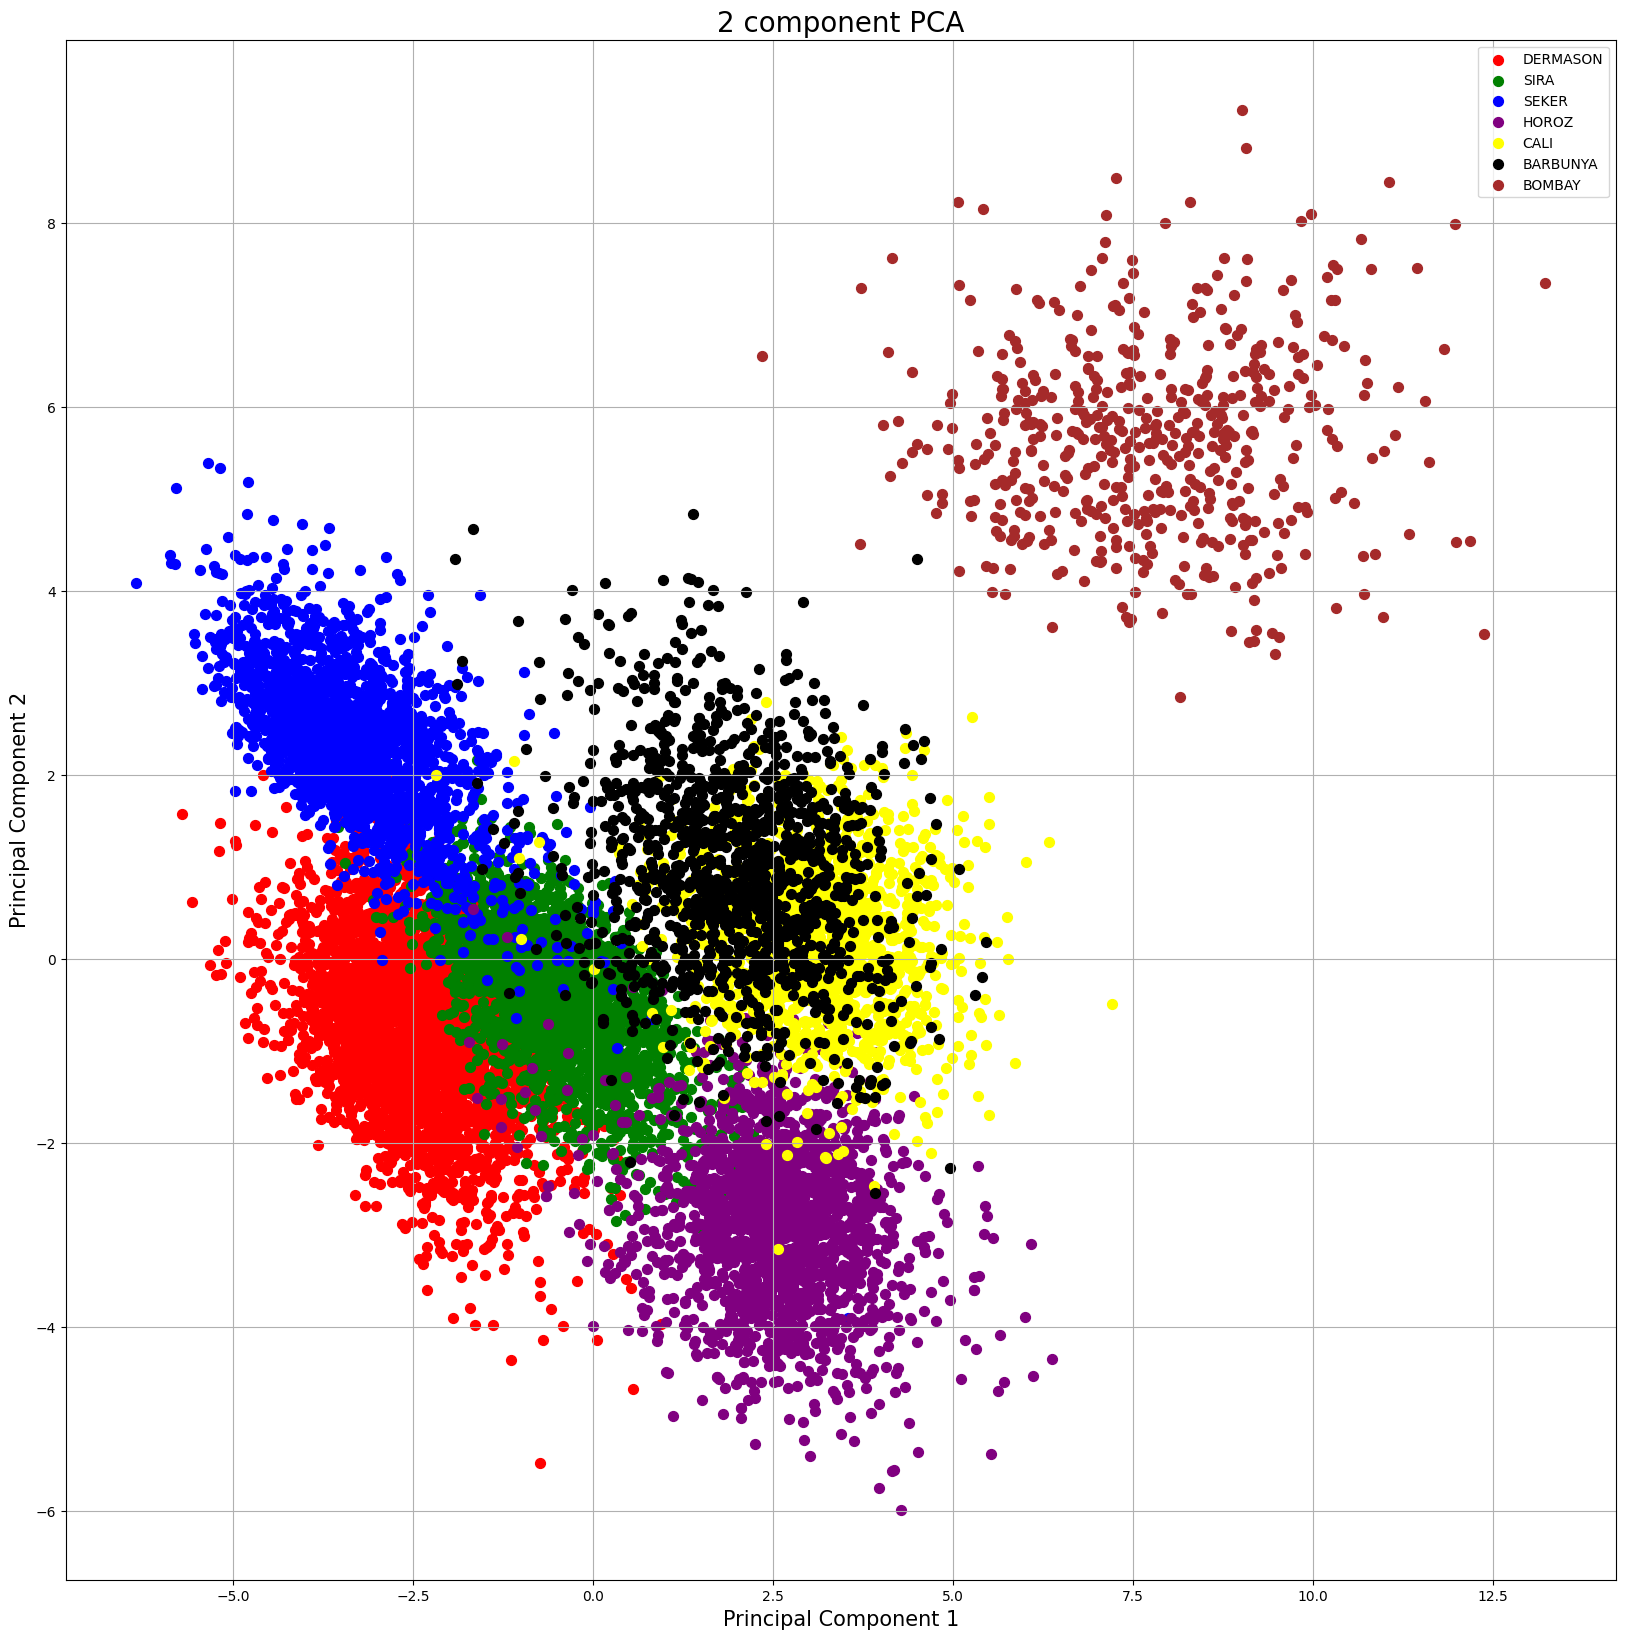

In [28]:
# mengatur tampilan plot
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# daftar kelas target  dan warna yang akan ditampilkan di plot
targets = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
colors = ['red', 'green', 'blue', 'purple' , 'yellow', 'black', 'brown']

# setiap iterasi akan memiliki nilai target class dan warna yang sesuai
for target, color in zip(targets, colors):
  # indicesToKeep: kondisi boolean akan true jika kolom class pada finalDf = target
  indicesToKeep = finalDf['class'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
             , finalDf.loc[indicesToKeep, 'Principal Component 2']
             , c = color
             , s = 50)
  ax.legend(targets)
  ax.grid()

dari visualisasi yang dihasilkan akan mendapatkan informasi distribusi dan pola datanya setelah dilakukan reduksi menggunakaan pca.

Dapat dilihat pada hasil bahwa data dry bean yang diolah dengan pca dapat disimpulkan bahwa terdapat dua komponen utama yaitu principle componen1 dan principle component 2 yang membentuk kecenderungan pengelompokan variabel. Dapat kita lihat dari plot bahwa sampel data dari class dry bean yang berbeda umumnya mengelompok bersama. Ini menunjukkan bahwa komponen utama yang diekstraksi oleh PCA dapat menangkap variasi dalam dataset yang terkait dengan class dry bean. Pada visualisasi ini dapat dilihat terdapat satu kelas (BOMBAY) yang terpisah dengan jelas dengan kelas lainnya. Namun, ada pula kelas lainnya yang cenderung tumpang tindih. Hal ini menunjukkan bahwa komponen utama yang diekstraksi oleh PCA tidak dapat sepenuhnya memisahkan semua class dry bean.

**varians yang dijelaskan**

In [29]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.55466439 0.26430973]
0.8189741179133909


dari output di atas, kita dapat mengamati bahwa principal component 1 menampung 55.46% informasi seadangkan principal component 2 menampung 26.43% informasi. Jika menggunakan dua komponen utama, kita dapat menjelaskan sekitar 81% dari variasi dalam data yang mana dapat memberikan pemahaman yang baik tentang struktur dan pola dalam data.
Pada hal ini, saat memproyeksikan data 16 dimensi menjadi dua dimensi terdapat sekitar 19% informasi hilang